In [46]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://user-images.githubusercontent.com/17066229/34965349-7b8d604c-faa7-11e7-848c-22f0a1022b5c.png'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

Text(0.5, 1.0, 'Original image')

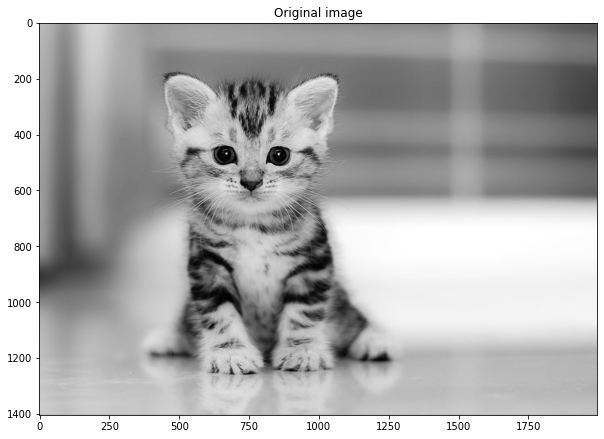

In [47]:
# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [48]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.
    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output


In [49]:
# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# convert our image into a numpy array
img = np.asarray(img)

# sharpening
#image_sharpen = convolve2d(img, kernel=KERNEL)

# final result
final_result = 2*img - convolve2d(img, kernel=KERNEL)

Text(0.5, 1.0, 'Shapened Filter image')

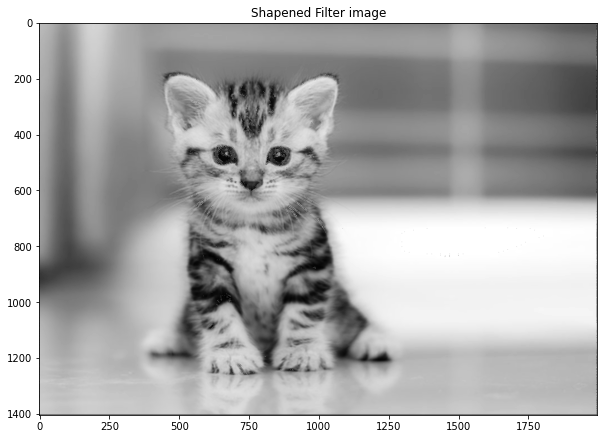

In [50]:
# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(final_result, cmap='gray', vmin=0, vmax=255)
plt.title("Shapened Filter image")